In [1]:
# import io
# import os
# import sys
# import glob
# from importlib import reload 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import ska


# Simple tests

In [2]:
sun = ska.Spectrum('sun.csv')

In [3]:
V = ska.Filter('Generic/Johnson.V')
J = ska.Filter('2MASS/2MASS.J')
H = ska.Filter('Paranal/VISTA.H')
K = ska.Filter('Paranal/VISTA.Ks')


In [4]:
H.central_wavelength, H.FWHM, H.band, H.facility, H.instrument

(1.6458237496601, 0.28942319016972, 'H', 'Paranal', 'VIRCAM')

In [5]:
sun.compute_color( V, H, phot_sys='Vega')
sun.Flux = sun.Flux / sun.Flux.max()

In [6]:
ceres = ska.Spectrum('ceres.csv')
ceres.reflectance_to_color( V, H, phot_sys='Vega')

vesta = ska.Spectrum('vesta.csv')
vesta.reflectance_to_color( V, H, phot_sys='Vega')

1.6431944126688625

(0.1, 2.5)

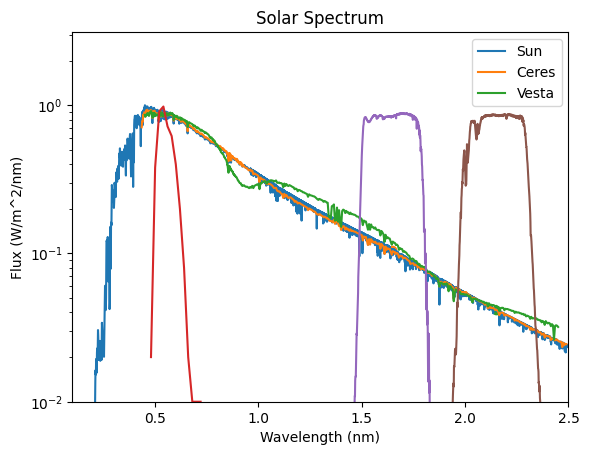

In [11]:
fig, ax = plt.subplots()


ax.plot(sun.Wavelength, sun.Flux, label='Sun')



ceres_spec = ceres.reflectance_to_flux(sun)
# ceres_spec.reflectance_to_flux(sun)
ax.plot( ceres_spec.Wavelength, ceres_spec.Flux, label='Ceres')

vesta_spec = vesta.reflectance_to_flux(sun)
# vesta_spec = vesta.copy()
# vesta_spec.reflectance_to_flux(sun)
ax.plot( vesta_spec.Wavelength, vesta_spec.Flux, label='Vesta')

for filt in [V, H, K]:
    refl = filt.compute_flux(sun)
    cent = filt.central_wavelength

    ax.plot( filt.wave, filt.trans)#, label=filt.id)
    ax.scatter(cent, refl)#, label=filt.id)


ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Flux (W/m^2/nm)')
ax.set_title('Solar Spectrum')
ax.legend()
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(bottom=1e-2)
ax.set_xlim(0.1,2.5)

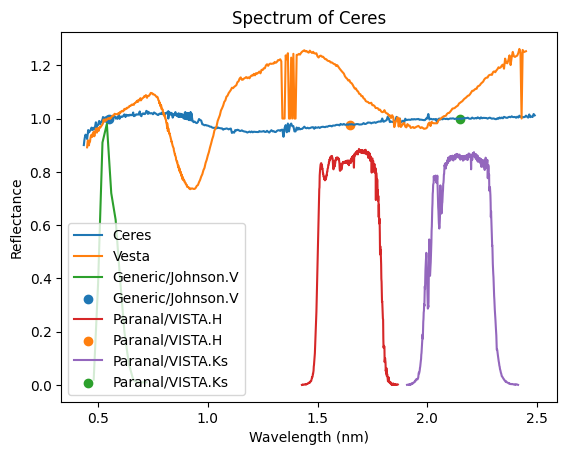

In [8]:
fig, ax = plt.subplots()


ax.plot(ceres.Wavelength, ceres.Flux, label='Ceres')
ax.plot(vesta.Wavelength, vesta.Flux, label='Vesta')

for filt in [V, H, K]:
    refl = filt.compute_flux(ceres)
    cent = filt.central_wavelength

    ax.plot( filt.wave, filt.trans, label=filt.id)
    ax.scatter(cent, refl, label=filt.id)

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Reflectance')
ax.set_title('Spectrum of Ceres')
ax.legend()
# ax.set_xscale('log')
# ax.set_yscale('log')

In [ ]:
fig, ax = plt.subplots()


ax.plot(sun.Wavelength, sun.Flux, label='Sun')

ax.plot( H.wave, H.trans, label='H')
ax.plot( K.wave, K.trans, label='H')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Flux (W/m^2/nm)')
ax.set_title('Solar Spectrum')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

In [ ]:
H.compute_flux( sun ),  V.compute_flux( sun )

In [ ]:
sun.compute_color( V, H, phot_sys='AB')

In [ ]:
skatools.compute_color( sun, V, H, phot_sys='Vega')

In [ ]:
df = pd.read_fwf('a000001.sp41.txt', header=None)
df.columns = ['wave', 'reflec', 'unc', 'flag']

In [ ]:
df

In [ ]:
df.to_csv('ceres.csv', index=False)